In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt, log
from pandas.plotting import scatter_matrix

## Chargement des données

In [4]:
# Lecture des données

data=pd.read_csv('./Datatrain/test_requete_features.csv')
data=data.drop(['Unnamed: 0'],axis=1)

# Vérification du contenu
data.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,6217,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,6217,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,6217,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,6217,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,6217,Yin Yang,Royal Lotus,1,0,2


In [5]:
len(data)

89497

In [10]:
## Peut être enlever les variables comme hotel_id, avatar_id ? 

data.describe()

,hotel_id,price,stock,date,mobile,avatar_id,parking,pool,children_policy
count,89497.000000,89497.000000,89497.000000,89497.000000,89497.000000,89497.000000,89497.000000,89497.000000,89497.000000
mean,498.831033,153.375353,61.286624,26.275830,0.533873,31439.460697,0.438082,0.172397,0.066673
std,287.877667,75.353523,60.734986,13.095305,0.498854,8466.156503,0.496154,0.377727,0.305216
min,0.000000,38.000000,0.000000,3.000000,0.000000,6217.000000,0.000000,0.000000,0.000000
25%,250.000000,96.000000,10.000000,13.000000,0.000000,34257.000000,0.000000,0.000000,0.000000
50%,501.000000,138.000000,44.000000,31.000000,1.000000,34261.000000,0.000000,0.000000,0.000000
75%,747.000000,189.000000,96.000000,37.000000,1.000000,34265.000000,1.000000,0.000000,0.000000
max,998.000000,547.000000,284.000000,44.000000,1.000000,34429.000000,1.000000,1.000000,2.000000


## Analyse descriptive

### Distribution de la variable à prédire 'price'

Text(0.5, 1.0, 'Distribution of price after log transform')

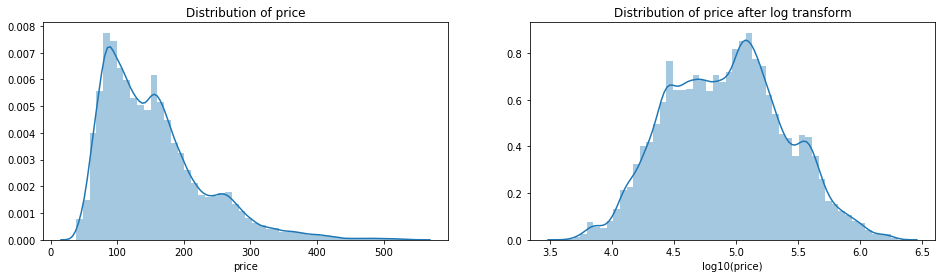

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["price"], ax=ax1)
ax1.set_title('Distribution of price')

data["log_price"]=data["price"].map(lambda x : log(x))
sns.distplot(data["log_price"].rename('log10(price)'), ax=ax2)
ax2.set_title('Distribution of price after log transform')

### Distribution des variables quantitatives

Text(0.5, 1.0, 'Distribution of date')

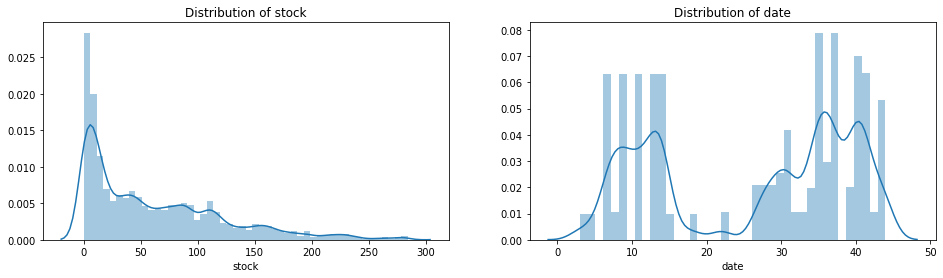

In [15]:
numerical=['stock','date']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["stock"], ax=ax1)
ax1.set_title('Distribution of stock')


## Date peut être pas pertinent ? 
sns.distplot(data["date"], ax=ax2)
ax2.set_title('Distribution of date')

In [42]:
data[numerical].corr()

,stock,date
stock,1.000000,0.762219
date,0.762219,1.000000


### Distribution variables qualitatives

In [50]:
list_parking=data["parking"].tolist()
list_parking2=[list_parking.count(0),list_parking.count(1)]

list_pool=data["pool"].tolist()
list_pool2=[list_pool.count(0),list_pool.count(1)]

list_children=data["children_policy"].tolist()
list_children2=[list_children.count(0),list_children.count(1),list_children.count(2)]

list_mobile=data["mobile"].tolist()
list_mobile2=[list_mobile.count(0),list_mobile.count(1)]


Text(0.5, 1.0, 'mobile')

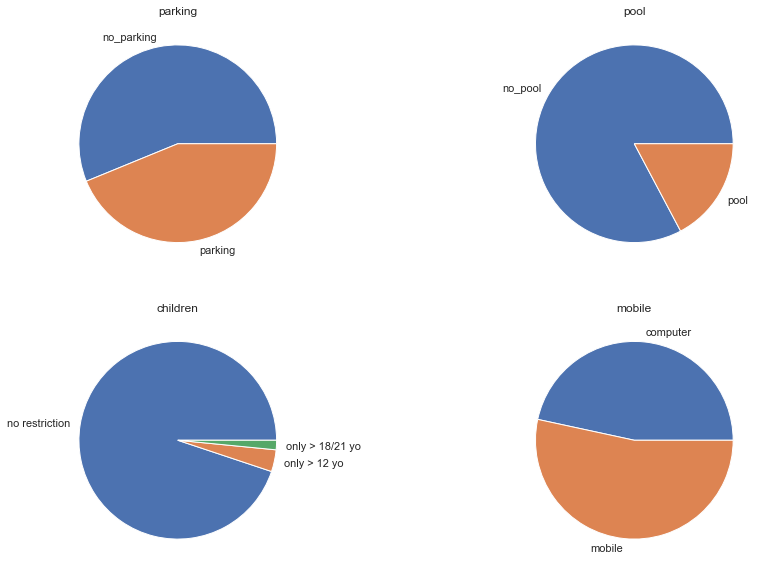

In [58]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
axis[0,0].pie(list_parking2, labels = ['no_parking','parking'])
axis[0,0].set_title('parking')

axis[0,1].pie(list_pool2, labels = ['no_pool','pool'])
axis[0,1].set_title('pool')

axis[1,0].pie(list_children2, labels = ['no restriction','only > 12 yo','only > 18/21 yo' ])
axis[1,0].set_title('children')

axis[1,1].pie(list_mobile2, labels = ['computer','mobile'])
axis[1,1].set_title('mobile')

### Distribution du prix par rapport aux variables qualitatives

In [72]:
## Comprend pas pourquoi ça ne fonctionne pas de tous les afficher d'un coup ? 


# fig, axis = plt.subplots(2,2,figsize=(20,15))
# sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)
# axis[0,0].set_title('parking')

# sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)
# axis[0,1].set_title('pool')

# sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)
# axis[1,0].set_title('children')

# sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)
# axis[1,1].set_title('mobile')

[Text(0.5, 0, '')]

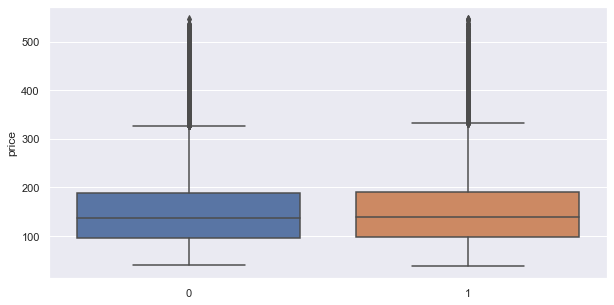

In [73]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

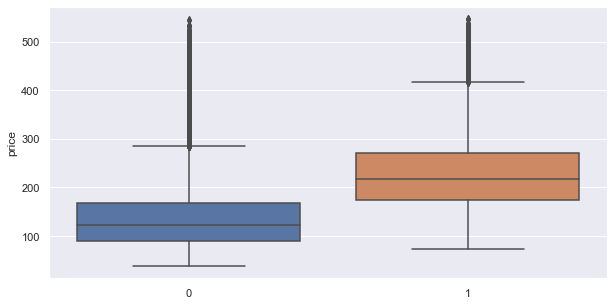

In [74]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

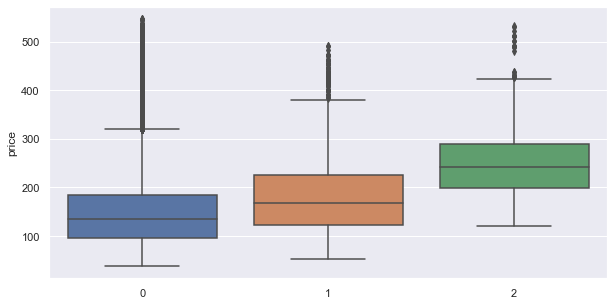

In [75]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

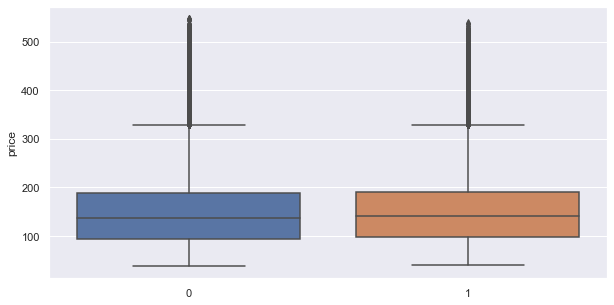

In [76]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)

## Modele

In [77]:
X_test=pd.read_csv('test_set.csv')